# Lecture 4 - Model Selection and Generalization

Last class we introduced **linear regression** with polynomial features and discussed the different system components.

Let $\{(x_i,t_i)\}_{i=1}^N$ be a set of training data samples, where each sample $x_i$ and target $t_i$ are continuous-valued, i.e. $x_i, t_i \in\mathbb{R}$.

1. **Feature Space:** we can create a *deterministic* set of features with, for example, polynomials:

$$\phi(x_i) = \left[1, x_i, x_i^2, \dots, x_i^{M-1}\right]^T$$

Each data sample $\{x_i\}_{i=1}^N$ will have its own representation, and so we can build a **data matrix** (or feature matrix) of size $N\times M$:

$$\mathbf{X} =\left[\begin{array}{c} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_N)^T \end{array}\right]  = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M-1}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M-1}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M-1}
\end{array}\right]$$

2. **Mapper**: a linear combination of features weighted by a set of parameters $\mathbf{w}=\left[w_0, w_1, w_2,\dots, w_{M-1}\right]^T$, taking the form

$$y = f(\phi(x),\mathbf{w}) = \sum_{j=0}^{M-1} w_j\phi_j(x)$$

or, in matrix form,

$$y = f(\phi(x),\mathbf{w}) = \mathbf{X}\mathbf{w}$$

3. **Objective Function**: function that assesses the *quality* of the output of the model, for example, an error-based function such as L2-norm of the error or the mean-squared error (MSE) function:

$$J(\mathbf{w}) = \frac{1}{2N} \sum_{n=1}^N \left(t_n - f(\phi(x_n),\mathbf{w})\right)^2 = \frac{1}{2N}\left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2$$

4. **Learning Algorithm**: an algorithm that solves or searches for the *optimal* values of the parameters $\mathbf{w}$ that optimize the objective function. It solves the following optimization problem:

$$\arg_{\mathbf{w}}\min J(\mathbf{w})$$

This is the **least mean squares (LMS)** function.

Because the selected model is linear on the parameters, we can solve for a solution analytical without having to resort to search algorithms such as the gradient descent.

Therefore, the solution for the parameters $\mathbf{w}$ is the one that solves the equation

$$\frac{\partial J(\mathbf{w})}{\partial\mathbf{w}}=0$$

We can use calculus algebra to take this derivative and solve for $\mathbf{w}$ (see Lecture 3 notes for this approach), or we can refer to our knowledge of statistics. Recall that the want the output $\mathbf{y}$ to be as close as possible to the target response $\mathbf{t}$, therefore, we are solving for $\mathbf{w}$ using the following equation:

$$\mathbf{t} = \mathbf{X}\mathbf{w}$$

But, note that $\mathbf{X}$ is a tall matrix (usually - and ideally - $N>>M$), so we **cannot** just that the left-inverse of $\mathbf{X}$.

This is the problem of finding the best line (or curve) that fits a set of points:

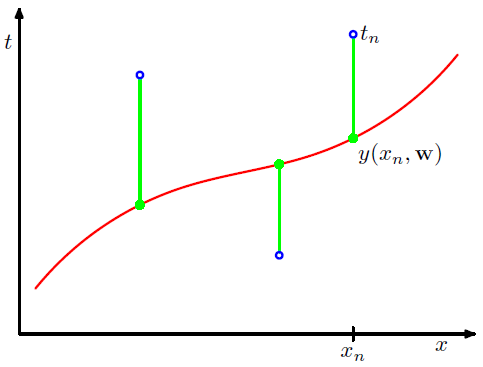

In [1]:
from IPython.display import Image
Image('figures/LeastSquares.png', width=400)

From your statistics course, you learned a solution to this problem: the **least squares solution**, which provides us with an analytical solution for $\mathbf{w}$, the $\mathbf{w}^*$:

$$\mathbf{w}^* = \mathbf{X}^{\dagger}\mathbf{t}$$

where $\mathbf{X}^{\dagger}$ is the pseudo-inverse of the tall matrix $\mathbf{X}$ and can be computed as

$$\mathbf{X}^{\dagger} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T$$

**This completes the training stage.** For any given input data, we can compute its polynomial representation and find a solution for $\mathbf{w}$:

$$\mathbf{w}^* = \mathbf{X}_{\text{train}} ^{\dagger}\mathbf{t}_{\text{train}}$$

and 

$$y_{\text{train}} = \mathbf{X}_{\text{train}}\mathbf{w}^*$$ 

In the **testing stage**, for any point we first component its polynomial representation, and then use the trained model (essentially the optimal set of parameters $\mathbf{w}^*$) to compute a prediction for that point:

$$y_{\text{test}} = \mathbf{X}_{\text{test}}\mathbf{w}^*$$ 

## Code Implementation

**What can you control?** 

<!-- * Model order $M$
* Feature representation or *basis functions* -->

How would you implement linear regression using polynomial features?
 * Let's see with an example.

## Polynomial Curve Fitting

### Example: Suppose Input Data is sampled from a (noisy) sine curve 

Suppose our data comes from a noisy sinusoidal: $t = \sin(2\pi x) + \epsilon$ where $\epsilon$ is a (univariate) Gaussian zero-mean random noise. 

* The univariate Gaussian Distribution is defined as:
$$\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{1/2}} \exp\left\{ - \frac{(x - \mu)^2}{2\sigma^2}\right\}$$

where $\mu$ is the mean and $\sigma^2$ is the variance. 

* If the noise is zero-mean Gaussian distributed, it is like we are saying there is a Gaussian around the true curve: 

$$t = y + \epsilon$$

Let's generate data from the *true* underlying function (which, in practice, we would not know).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation gVar'''
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N) 
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    return x, t

In [ ]:
# Generate input samples and desired values

N = 50 # number of data samples
a, b = [0,1] # data samples interval
sigma_train = 0.3 # standard deviation of the zero-mean Gaussian noise
sigma_test = 0.1
x_train, t_train = NoisySinusoidalData(N, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(20, a, b, sigma_test) # Test Data - Noisy sinusoidal

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b',linewidths=3,  label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=3, label = 'True Sinusoidal')
plt.scatter(x_test, t_test,c='r', marker='*',linewidths=3, label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

Now, let us implement linear regression with polynomial features or **polynomial regression**.

Before build this function, let's take a look at some strategies to create the **data matrix** $\mathbf{X}$:

In [ ]:
# Model Order
M = #select a model order

# Find the parameters that fit the noisy sinusoidal
w, y_train, error = PolynomialRegression(x_train,t_train,M) 

plt.figure(figsize=(10,7))
plt.scatter(x_train,t_train, c='b',linewidths=3, label='Training Data')
plt.plot(x_train,y_train,'r--', linewidth=3,label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'g',linewidth=3, label = 'True Function')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x',size=15)
plt.ylabel('Desired Values, t',size=15);

### Observations

* What happens when the polynomial model order $M$ increases/decreases?

* How large/small do the weight parameter values are as we increase $M$? Could this information be useful?

* Which model order $M$ works best? Which $M$ would you choose?

In [ ]:
plt.figure(figsize=(10,5))

# To be finished in class

plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0, size=15);

Let's see how well does this trained model **generalize** to the test data, to which we do not have labels.

- In this synthetic environment, we have the label values for the test samples. But in practice, we will **not** have labels for the test data.

**Testing Stage**
* Apply the same feature extraction as in training: $\mathbf{X}_{test}$, where $\mathbf{X}_{test}$ is a $K\times M$ data matrix
* Predict the output using the learned parameters $\mathbf{w}^*$, that is, $\mathbf{y}_{test} = \mathbf{X}_{test}\mathbf{w}^*$

3. **Predict Labels.** In this step, we will use the trained model (the vector of coefficients $\mathbf{w}^*$ and compute the predicted labels for the feature representation of the test samples.

In [ ]:
# To be finished in class: Predict output for test samples

plt.figure(figsize=(10,7))
plt.scatter(x_train,t_train,c='b', linewidths=3, label='Training Data')
plt.plot(x_train,y_train,'r--', linewidth=3, label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'g', linewidth=3, label = 'True Function')
plt.scatter(x_test,t_test,c='r', marker='*', linewidths=3, label = 'Test Data')
plt.plot(x_test,y_test,'m--',linewidth=3, label = 'Predictions')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x',size=15)
plt.ylabel('Desired Values, t',size=15);

### Observations:

* How did the trained model *fit* in the test data?
* Is it able to *generalize*?
* Can we **design** a *training* strategy that can tells us how *well* we are performing in *unseen and unlabeled* data?

* What happens when the test points fall outside the range of what the model has *learned*?

In [ ]:
M = 4
w, y, error = PolynomialRegression(x_train,t_train,M) 

x_test2, t_test2 = NoisySinusoidalData(20, 0, 1.5, 0.1)

plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=3, label = 'True Sinusoidal')
plt.scatter(x_test2, t_test2, c='r', marker='*',linewidths=3, label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x',size=15)
plt.ylabel('Desired Values, t',size=15);

In [ ]:
%matplotlib notebook

# To be finished in class: Predict output for test samples

plt.figure(figsize=(10,7))
plt.scatter(x_train,t_train,c='b', linewidths=3, label='Training Data')
plt.plot(x_train,y_train,'r--', linewidth=3, label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'g', linewidth=3, label = 'True Function')
plt.scatter(x_test2,t_test2,c='r', marker='*', linewidths=3, label = 'Test Data')
plt.plot(x_test2,y_test2,'m--',linewidth=3, label = 'Predictions')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x',size=15)
plt.ylabel('Desired Values, t',size=15);

* How do we select the *best* model order? - Cross-validation

Let's compute the **Least Mean Squares (LMS)** objective function as a function of the model order $M$:

In [ ]:
J_train = []
J_validation = []
Mrange = 18

for M in range(1,Mrange):
    
    # To be finished in class

fig = plt.figure(figsize=(8,5))
plt.plot(list(range(1,Mrange)),J_train,'bo-', label = 'Training')
plt.plot(list(range(1,Mrange)),J_validation,'r*-', label = 'Validation')
plt.title('Cross-Validation',size=15)
plt.xlabel('Model order, $M$',size=15)
plt.ylabel('$J(\mathbf{w})$',size=15)
plt.legend(fontsize=20);

## Another Example

Let's take a look at COVID-19 data from the state of Florida. Data obtained from the [CDC COVID Data Tracker](https://covid.cdc.gov/covid-data-tracker/#trends_dailytrendscases) on August 29, 2021.

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(cases)
plt.xlabel('Days', size=15)
plt.ylabel('Cumulative Total Cases', size=15)
plt.xticks(range(0,len(cases),50), date[range(0,len(cases),50)],rotation=30,size=15);

In [ ]:
plt.figure(figsize=(10,5))

# To be finished in class

plt.xlabel('Days', size=15)
plt.ylabel('Cumulative Total Cases', size=15);

Let's fit a **polynomial regression** model that predicts the number of daily new cases of COVID-19 in Florida.

Let's compute the optimal set of parameters for the foam height model for each brand:

In [ ]:
M = ##choose model order

w, y, e = PolynomialRegression(x, t, M)

In [ ]:
print('Model Coefficients: w=',w)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x, t,'-o', label='data')
plt.plot(x, y, 'r', label='Estimated Model')
plt.xlabel('Days', size=15)
plt.ylabel('New Cases', size=15)
plt.legend(fontsize=15);

**What is the predicted daily new cases for the next 3 days?**

In [ ]:
prediction = PolynomialRegression_test(np.array([90,91,92]), M, w)

prediction

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x, t,'-o', label='data')
plt.plot(x, y, 'r', label='Estimated Model')
plt.scatter([90,91,92], prediction, marker='*',c='r')
plt.xlabel('Days', size=15)
plt.ylabel('New Cases', size=15);

### Observations

* We did not encode any type of physical behavior into the model, (for example, enforcing the cumulative number of new cases to be the same or larger than the previous day), the model is not able to transcribe them.

* The prediction point falls outside the region in which the model was trained and therefore the predictions might not be reliable. We can compute confidence intervals to access our confidence in these predictions.

* The **model choice** also plays an important factor in the prediction. What if we considered an exponential model?

In [ ]:
plt.figure(figsize=(10,5))

#To be finished in class

plt.xlabel('Days', fontsize=15)
plt.ylabel('New Cases in log-scale', fontsize=15);

Now that we have transformed the desired label as its logarithm, our goal is to fit a linear model to approximate:

\begin{align}
w_0 + w_1\mathbf{x}+\dots+w_M\mathbf{x}^M &= \ln(t) \\
\iff e^{w_0 + w_1\mathbf{x}+\dots+w_M\mathbf{x}^M} &= t
\end{align}

In [ ]:
M = 3

w_log, y_log, e_log = PolynomialRegression(x, t_log, M)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x, t,'-o', label='data')

#To be finished in class

plt.xlabel('Days', fontsize=15)
plt.ylabel('New Cases', fontsize=15)
plt.legend();

In [ ]:
pred_exp = np.exp(w_log[0] + w_log[1]*np.array([90,92,92]) + w_log[2]*np.array([90,91,92])**2)

plt.figure(figsize=(10,5))
plt.plot(x, t,'-o', label='data')
plt.plot(x, np.exp(w_log[0] + w_log[1]*x + w_log[2]*x**2), 'c', label='Exponential Model')
plt.scatter([90,92,92], pred_exp, marker='*',c='c')
plt.xlabel('Days', fontsize=15)
plt.ylabel('New Cases', fontsize=15);

Qualitative comparison of both models:

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x, t,'o', label='data')
plt.plot(x, y, 'r', label='Polynomial Model')
plt.plot(x,  np.exp(w_log[0] + w_log[1]*x + w_log[2]*x**2), 'c', label='Exponential Model')
plt.scatter([90,92,92], pred_exp, marker='*',c='c')
plt.scatter([90,92,92], prediction, marker='*',c='r')
plt.xlabel('Days', fontsize=15)
plt.ylabel('New Cases', fontsize=15)
plt.legend(fontsize=15);